In [104]:
#1b
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [105]:
#1a
hostel_data=pd.read_csv(r'C:\Users\jayal\OneDrive\Desktop\sowmya\hostel_data_classified.csv')

In [106]:
#2a
hostel_data.head(2)

,Temperature,Humidity,CO2,Light Intensity,Harmful
0,28.99,80.79,0.00,4263.0,1
1,29.01,80.75,564.07,4279.0,1


In [107]:
hostel_data.shape

(38370, 5)

In [108]:
hostel_data.columns

Index(['Temperature', 'Humidity', 'CO2', 'Light Intensity', 'Harmful'], dtype='object')

#2b
EXPLORATORY DATA ANALYSIS--getting insights about data through data visualization

since we only have numerical data we are exploring them using Histograms and Boxplots which are generally used to explore numerical data

In [109]:
cmap=plt.get_cmap('jet')
cmap1=plt.get_cmap('Spectral')

In [110]:
hostel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38370 entries, 0 to 38369
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      38370 non-null  float64
 1   Humidity         38370 non-null  float64
 2   CO2              38370 non-null  float64
 3   Light Intensity  38370 non-null  float64
 4   Harmful          38370 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.5 MB


In [111]:
hostel_data.describe()

,Temperature,Humidity,CO2,Light Intensity,Harmful
count,38370.000000,38370.000000,38370.000000,38370.000000,38370.000000
mean,31.881779,58.044582,483.656671,3764.826675,0.976440
std,7.178957,12.806226,123.100410,4508.926029,0.151676
min,4.000000,29.590000,0.000000,0.000000,0.000000
25%,29.730000,50.090000,503.900000,0.000000,1.000000
50%,31.640000,58.855000,515.160000,512.990000,1.000000
75%,36.740000,67.850000,529.590000,8803.750000,1.000000
max,48.000000,80.790000,671.080000,12751.000000,1.000000


In [112]:
hostel_data.isnull().sum()

Temperature        0
Humidity           0
CO2                0
Light Intensity    0
Harmful            0
dtype: int64

In [113]:
hostel_data['Harmful'].value_counts()

Harmful
1    37466
0      904
Name: count, dtype: int64

In [114]:
37466/(37466+904)

0.9764399270263227

<Axes: ylabel='Harmful'>

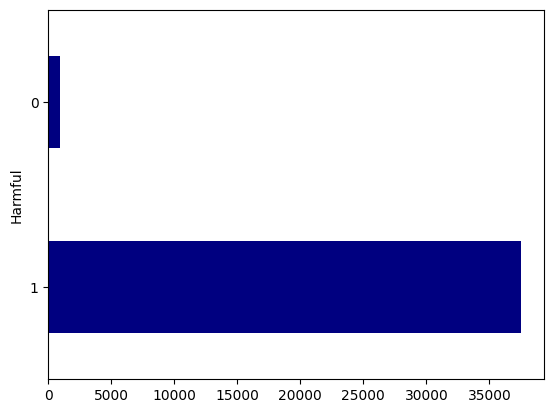

In [115]:
hostel_data['Harmful'].value_counts().plot.barh(cmap=cmap)

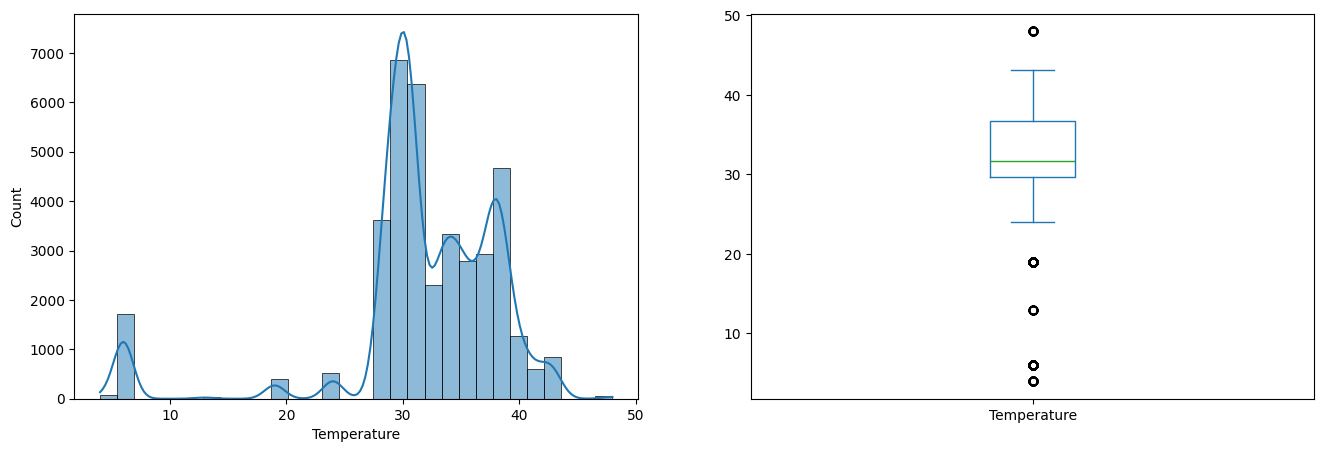

In [116]:
plt.figure()
plt.subplot(121)
sns.histplot(data=hostel_data, x="Temperature", bins=30, kde=True)
plt.subplot(122)
hostel_data['Temperature'].plot.box(figsize=(16,5))
plt.show()

Temperature is bit right skewed since most values lie between 28 to 36 .
There are outliers existing beyond 40 which will be further analysed and peak lie around 31 .

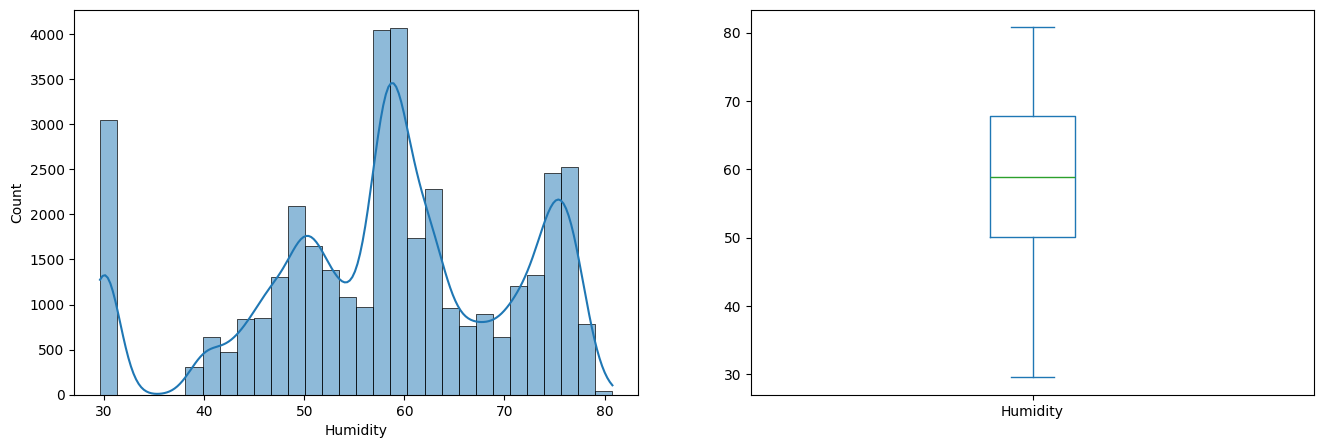

In [117]:
plt.figure()
plt.subplot(121)
sns.histplot(data=hostel_data, x="Humidity", bins=30, kde=True)  

plt.subplot(122)
hostel_data['Humidity'].plot.box(figsize=(16,5))

plt.show()

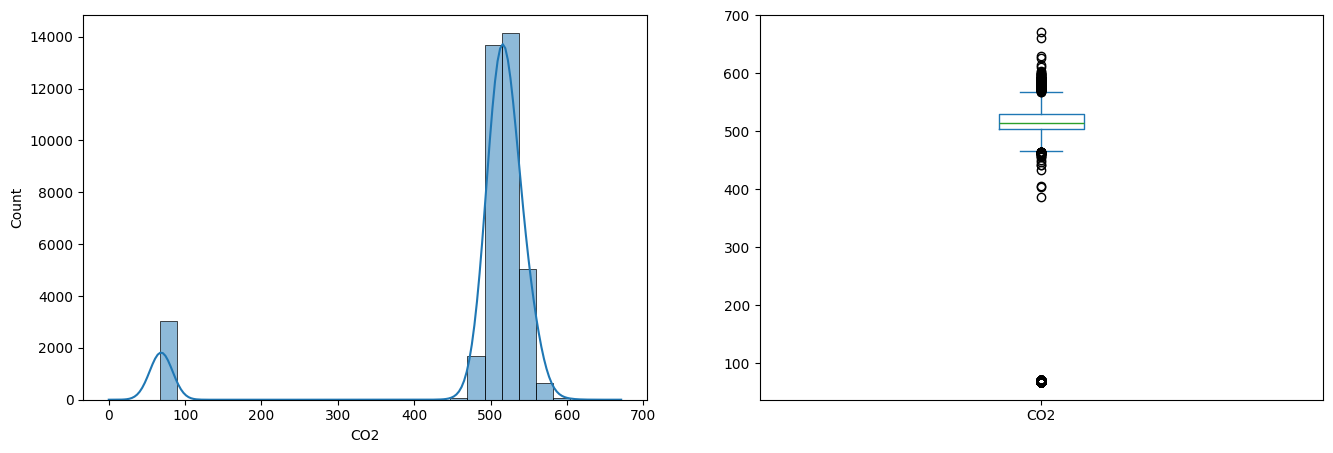

In [118]:
plt.figure()
plt.subplot(121)
#df = hostel_data.dropna()
df = hostel_data[hostel_data["CO2"] > 0]
sns.histplot(data=hostel_data, x="CO2", bins=30, kde=True)

plt.subplot(122)
df['CO2'].plot.box(figsize=(16,5))

plt.show()


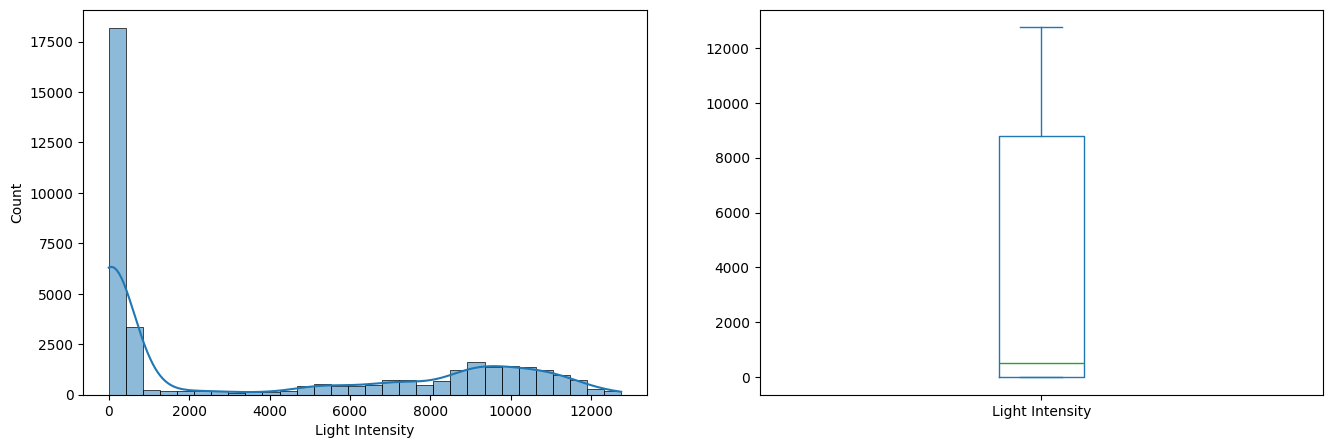

In [119]:
plt.figure()
plt.subplot(121)
df = hostel_data.dropna()  
sns.histplot(data=hostel_data, x="Light Intensity", bins=30, kde=True)

plt.subplot(122)
df['Light Intensity'].plot.box(figsize=(16,5))

plt.show()

Bivariate Analysis

In [120]:

cmap=plt.get_cmap('Spectral')

Text(0.5, 1.0, 'Temperature vs Harmful')

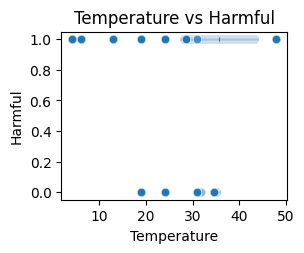

In [121]:
plt.subplot(2, 2, 1)
sns.scatterplot(x=hostel_data["Temperature"], y=hostel_data["Harmful"], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Harmful")
plt.title("Temperature vs Harmful")

Text(0.5, 1.0, 'Humidity vs Harmful')

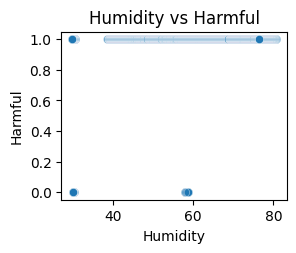

In [122]:
plt.subplot(2, 2, 2)
sns.scatterplot(x=hostel_data["Humidity"], y=hostel_data["Harmful"], alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Harmful")
plt.title("Humidity vs Harmful")

Text(0.5, 1.0, 'CO2 vs Harmful')

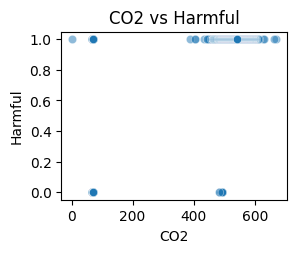

In [123]:
plt.subplot(2, 2, 3)
sns.scatterplot(x=hostel_data["CO2"], y=hostel_data["Harmful"], alpha=0.5)
plt.xlabel("CO2")
plt.ylabel("Harmful")
plt.title("CO2 vs Harmful")

Text(0.5, 1.0, 'Light Intensity vs Harmful')

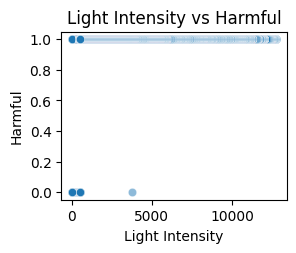

In [124]:
plt.subplot(2, 2, 4)
sns.scatterplot(x=hostel_data["Light Intensity"], y=hostel_data["Harmful"], alpha=0.5)
plt.xlabel("Light Intensity")
plt.ylabel("Harmful")
plt.title("Light Intensity vs Harmful")

Correlational analysis

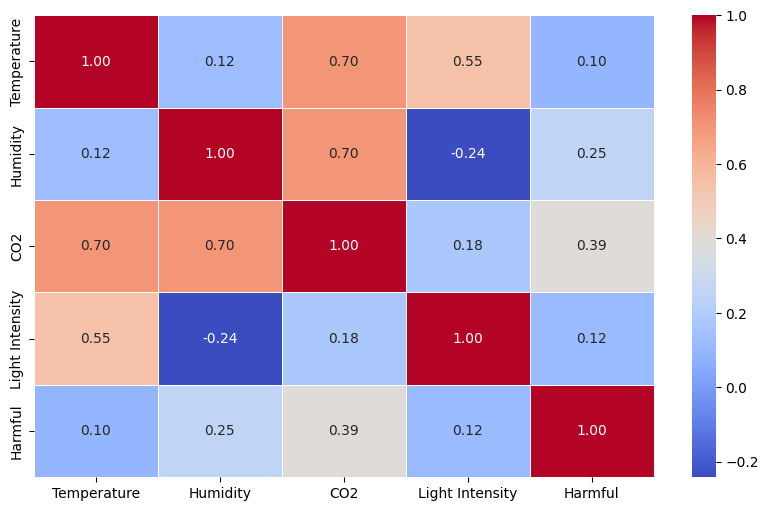

In [125]:
#2c
import seaborn as sns

correlation_matrix = hostel_data.corr()
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

3.DATA PRE-PROCESSING AND CLEANING

In [126]:
hostel_df=hostel_data.copy()

In [127]:
hostel_data.isnull().sum()

Temperature        0
Humidity           0
CO2                0
Light Intensity    0
Harmful            0
dtype: int64

In [128]:
hostel_data["CO2"].value_counts()[0]

np.int64(1)

In [129]:
#Here while calculating its showing that there is no missing values but in co2 we do have a value as zero which is faulty.Thus we are replacing that value with the median 
hostel_data.loc[0, "CO2"] = hostel_data["CO2"].median()

In [130]:
hostel_data.head()

,Temperature,Humidity,CO2,Light Intensity,Harmful
0,28.99,80.79,515.16,4263.0,1
1,29.01,80.75,564.07,4279.0,1
2,29.01,80.73,671.08,4279.0,1
3,29.02,80.74,625.94,4287.0,1
4,29.05,80.73,630.03,4294.0,1


In [131]:
original_numeric_cols = list(hostel_data.columns)
def count_outliers_iqr(data, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        outlier_counts[column] = outlier_count
    return outlier_counts

# Get outlier counts for original numerical columns
outliers = count_outliers_iqr(hostel_data, original_numeric_cols)

for column, count in outliers.items():
    print(f"{column}: {count} outliers")

Temperature: 2270 outliers
Humidity: 0 outliers
CO2: 3209 outliers
Light Intensity: 0 outliers
Harmful: 904 outliers


In [132]:

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping on 'temperature' column
cap_outliers_iqr(hostel_data, "Temperature")

hostel_data["Temperature"].describe()

count    38370.000000
mean        32.506021
std          5.198079
min         19.215000
25%         29.730000
50%         31.640000
75%         36.740000
max         47.255000
Name: Temperature, dtype: float64

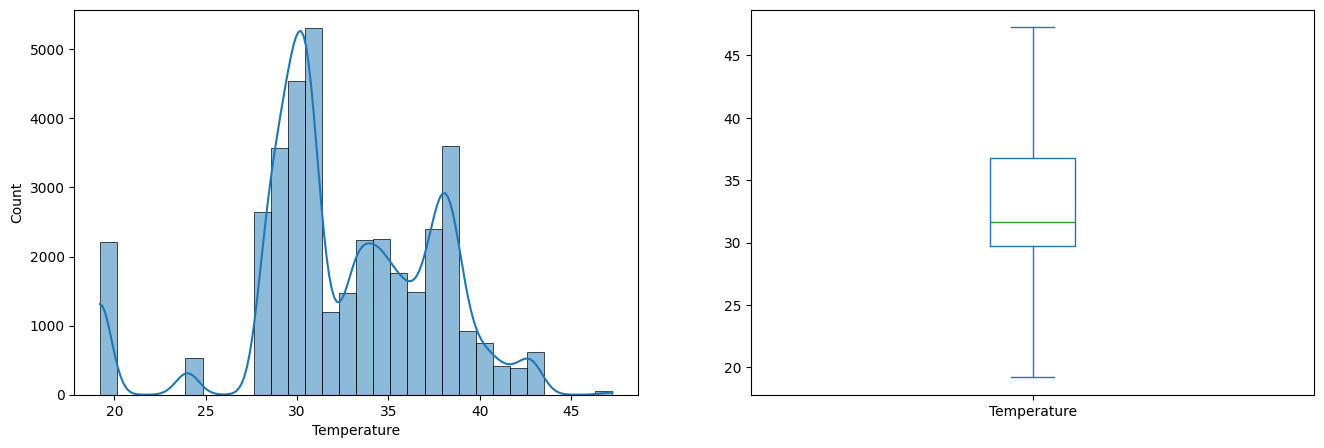

In [133]:
plt.figure()
plt.subplot(121)
sns.histplot(data=hostel_data, x="Temperature", bins=30, kde=True)
plt.subplot(122)
hostel_data['Temperature'].plot.box(figsize=(16,5))
plt.show()

In [134]:
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Count outliers for each column
outlier_counts = {
    "Temperature": count_outliers(hostel_data, "Temperature"),
    "CO2": count_outliers(hostel_data, "CO2"),
    "Harmful": count_outliers(hostel_data, "Harmful")
}

# Display outlier counts
outlier_counts

{'Temperature': 0, 'CO2': 3209, 'Harmful': 904}

New Min: 465.3649999999999
New Max: 568.1250000000001


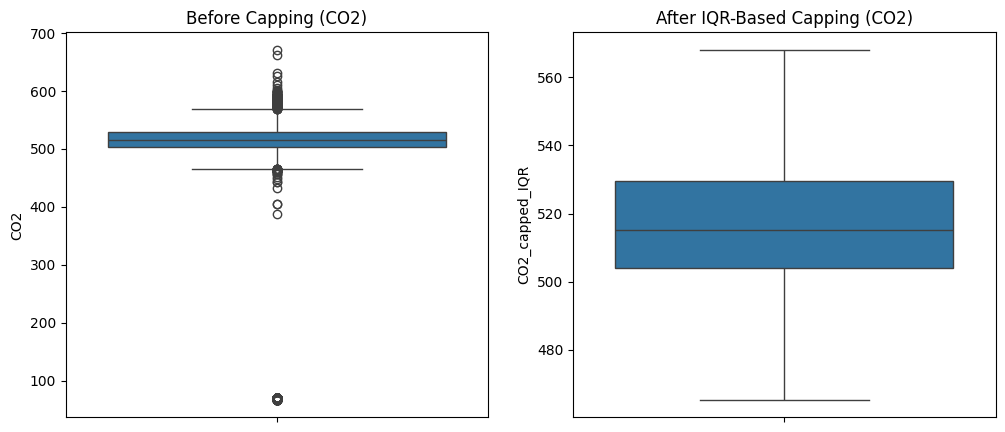

In [135]:
#capping for co2 column
Q1 = hostel_data["CO2"].quantile(0.25)
Q3 = hostel_data["CO2"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values beyond the IQR limits
hostel_data["CO2_capped_IQR"] = hostel_data["CO2"].clip(lower=lower_bound, upper=upper_bound)

# Check new min and max values
print("New Min:", hostel_data["CO2_capped_IQR"].min())
print("New Max:", hostel_data["CO2_capped_IQR"].max())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=hostel_data["CO2"], ax=axes[0])
axes[0].set_title("Before Capping (CO2)")

sns.boxplot(y=hostel_data["CO2_capped_IQR"], ax=axes[1])
axes[1].set_title("After IQR-Based Capping (CO2)")

plt.show()


In [136]:
# Compute IQR for the capped CO2 column
Q1 = hostel_data["CO2_capped_IQR"].quantile(0.25)
Q3 = hostel_data["CO2_capped_IQR"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find remaining outliers
co2_capped_outliers = hostel_data[
    (hostel_data["CO2_capped_IQR"] < lower_bound) | (hostel_data["CO2_capped_IQR"] > upper_bound)
]

print(f"Total outliers in CO2_capped_IQR (IQR Method): {len(co2_capped_outliers)}")
co2_capped_outliers.head()


Total outliers in CO2_capped_IQR (IQR Method): 0


,Temperature,Humidity,CO2,Light Intensity,Harmful,CO2_capped_IQR


In [137]:
!pip install imbalanced-learn


In [138]:
import imblearn
print(imblearn.__version__)

0.13.0


In [139]:
print(hostel_data["Harmful"].unique())

[1 0]


In [140]:
print(hostel_data["Harmful"].value_counts())

Harmful
1    37466
0      904
Name: count, dtype: int64


In [141]:
if "CO2_capped_IQR" in hostel_data.columns:
    hostel_data.rename(columns={"CO2_capped_IQR": "CO2_capped"}, inplace=True)

# Drop the original CO2 column if it exists
if "CO2" in hostel_data.columns:
    hostel_data.drop(columns=["CO2"], inplace=True)

# Verify column names
print("Updated columns in dataset:", hostel_data.columns.tolist())

Updated columns in dataset: ['Temperature', 'Humidity', 'Light Intensity', 'Harmful', 'CO2_capped']


In [142]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Ensure CO2_capped is used and CO2 is removed
if "CO2_capped" in hostel_data.columns:
    hostel_data = hostel_data.drop(columns=["CO2"], errors="ignore")  

X = hostel_data.drop(columns=["Harmful"])  
y = hostel_data["Harmful"] 

print("Class distribution before SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

hostel_data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
hostel_data_balanced["Harmful"] = y_resampled

print("Class distribution after SMOTE:", Counter(y_resampled))

hostel_data_balanced.to_csv("balanced_hostel_data.csv", index=False)


Class distribution before SMOTE: Counter({1: 37466, 0: 904})
Class distribution after SMOTE: Counter({1: 37466, 0: 7493})


In [143]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = hostel_data_balanced.copy()

X = df.drop(columns=["Harmful"])  
y = df["Harmful"]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
hostel_data_standardized = X_scaled.copy()
hostel_data_standardized["Harmful"] = y


hostel_data_standardized.to_csv("standardized_hostel_data.csv", index=False)

print("Standardization Applied Successfully!")


Standardization Applied Successfully!


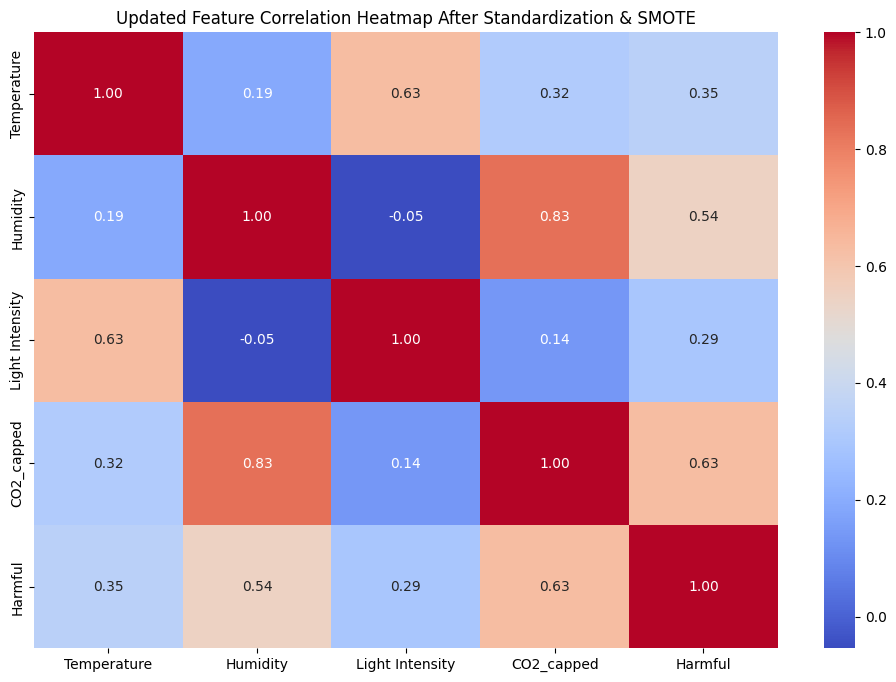

In [144]:
corr_matrix = hostel_data_balanced.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Feature Correlation Heatmap After Standardization & SMOTE")
plt.show()

In [145]:
hostel_data_balanced.head()

,Temperature,Humidity,Light Intensity,CO2_capped,Harmful
0,28.99,80.79,4263.0,515.160,1
1,29.01,80.75,4279.0,564.070,1
2,29.01,80.73,4279.0,568.125,1
3,29.02,80.74,4287.0,568.125,1
4,29.05,80.73,4294.0,568.125,1


In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

X = hostel_data_standardized.drop(columns=["Harmful"]) 
y = hostel_data_standardized["Harmful"]

model = LogisticRegression(max_iter=1000, random_state=42)

n_features_to_select = 4 
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features using RFE:")
print(selected_features)

X_selected = X[selected_features]

X_selected.to_csv("selected_features_hostel_data.csv", index=False)

print(" Feature Selection with RFE Completed!")


Selected Features using RFE:
Index(['Temperature', 'Humidity', 'Light Intensity', 'CO2_capped'], dtype='object')
 Feature Selection with RFE Completed!


In [147]:
print("Number of features available:", X.shape[1])
print("Feature names:", X.columns.tolist())

Number of features available: 4
Feature names: ['Temperature', 'Humidity', 'Light Intensity', 'CO2_capped']


In [148]:
print("Columns in dataset:", hostel_data_standardized.columns.tolist())

Columns in dataset: ['Temperature', 'Humidity', 'Light Intensity', 'CO2_capped', 'Harmful']


4.MODEL BUILDING


In [178]:
from sklearn.model_selection import train_test_split

X = hostel_data_balanced.drop(columns=["Harmful"])  
y = hostel_data_balanced["Harmful"] 

# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])


Training Set Size: 35967
Testing Set Size: 8992


In [179]:
# 70-30 Split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training Set (70%) Size:", X_train_70.shape[0])
print("Testing Set (30%) Size:", X_test_30.shape[0])


Training Set (70%) Size: 31471
Testing Set (30%) Size: 13488


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)


y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.9194839857651246
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      1499
           1       0.93      0.98      0.95      7493

    accuracy                           0.92      8992
   macro avg       0.90      0.79      0.83      8992
weighted avg       0.92      0.92      0.91      8992



In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [182]:
y_pred_tree = tree_model.predict(X_test)

In [183]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9972197508896797

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1499
           1       1.00      1.00      1.00      7493

    accuracy                           1.00      8992
   macro avg       1.00      0.99      0.99      8992
weighted avg       1.00      1.00      1.00      8992



In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred_best_tree = best_tree.predict(X_test)

print("Best Decision Tree Hyperparameters:", grid_search.best_params_)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_tree))

Best Decision Tree Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.9978870106761566

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1499
           1       1.00      1.00      1.00      7493

    accuracy                           1.00      8992
   macro avg       1.00      1.00      1.00      8992
weighted avg       1.00      1.00      1.00      8992



In [185]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_tree))

Cross-Validation Scores: [0.99805393 0.99791493 0.99791464 0.9965244  0.99819269]
Mean CV Accuracy: 0.997720117645963
Test Accuracy: 0.9978870106761566


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

ASSIGNMENT 2 

In [187]:
#1 Ensemble method 

In [188]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [189]:
y_pred_rf = rf_model.predict(X_test)

In [190]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1499
           1       1.00      1.00      1.00      7493

    accuracy                           1.00      8992
   macro avg       1.00      0.99      1.00      8992
weighted avg       1.00      1.00      1.00      8992

Accuracy: 0.9973309608540926


In [191]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
y_pred_knn = knn_model.predict(X_test)

In [193]:
print("K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_knn))

K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1499
           1       1.00      0.99      1.00      7493

    accuracy                           0.99      8992
   macro avg       0.98      0.99      0.99      8992
weighted avg       0.99      0.99      0.99      8992

Accuracy: 0.9927713523131673
AUC-ROC: 0.9921938706056719


In [194]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [195]:
models = {
    "Logistic Regression": y_pred_logistic,
    "Decision Tree": y_pred_best_tree,
    "Random Forest": y_pred_rf,
    "K-Nearest Neighbors": y_pred_knn
}

metrics = {}
for model_name, y_pred in models.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    metrics[model_name] = [precision, recall, f1, auc]

#Comparision Chart

In [196]:
metrics_df = pd.DataFrame(metrics, index=["Precision", "Recall", "F1-Score", "AUC-ROC"])

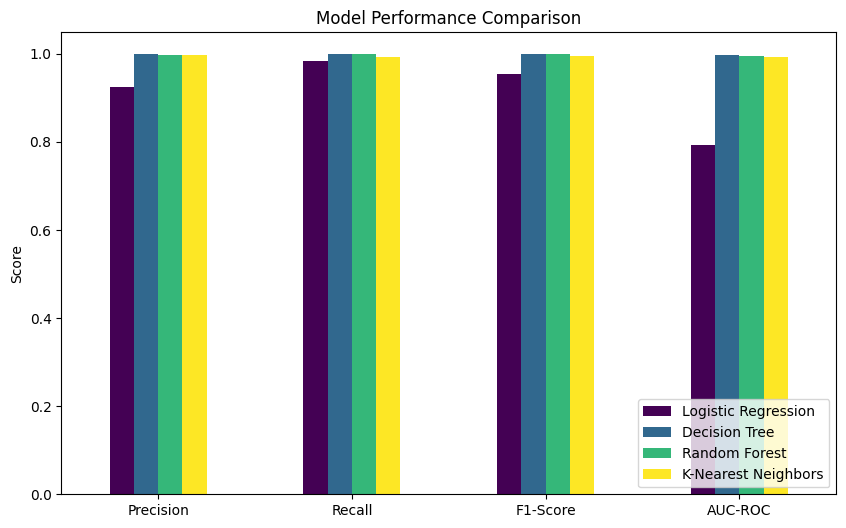

In [197]:
metrics_df.plot(kind='bar', figsize=(10,6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

In [198]:
best_model = metrics_df.idxmax(axis=1)["F1-Score"]  
print(f"The best model is {best_model} based on F1-score, which balances precision and recall effectively.")

The best model is Decision Tree based on F1-score, which balances precision and recall effectively.
